In [27]:
import numpy as np 
import pandas as pd 
import time
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from gensim.models import Doc2Vec, doc2vec
from nltk.corpus import stopwords
from nltk.stem.porter import *
from textblob import TextBlob, Word
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, SGDClassifier

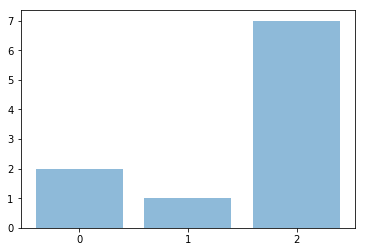

In [35]:
df = pd.read_csv("sampleTrain.csv", dtype={"label": int, "text": str})
p = df.groupby("label").count()

plt.figure(0)
plt.bar(p.index, p.text, alpha=0.5)
plt.xticks(p.index)
plt.show()

In [37]:
y = df.label
text = df.text

tick = time.time()
#Convert all text to lower case
text = text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))

#Remove all punctuation
for i in range(0, len(text)):
    text[i] = re.sub(r'[^\w\s]', "", text[i])

#Remove stop words (removes important words! needs modification)
stop = stopwords.words("english")
stop = stop[:143]
stop.remove("not")
stop.remove("against")
stop.remove("no")
text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))

#Stemming
stemmer = PorterStemmer()
text = text.apply(lambda x: " ".join(stemmer.stem(x) for x in str(x).split()))

#seperating words into lists
for i, line in enumerate(text):
  text[i] = line.split()

df.text = text
text = list(text)
print(time.time() - tick)
df
#df.to_csv("out.csv", sep=",")

0.027962207794189453


,label,text
0,1,"[nice, coffe, shop, downtown, montreal, next, ..."
1,2,"[play, game, oop, mean, play, game, good, old,..."
2,2,"[great, place, gay, watch, total, suburban, va..."
3,2,"[omg, ron, wine, guy, darren, chees, guy, supe..."
4,2,"[see, lot, neg, review, no, problem, thoroughl..."
5,0,"[came, recent, get, alaskan, salt, that, sold,..."
6,2,"[servic, outstand, usual, price, still, unbeat..."
7,0,"[one, star, lowest, default, otherwis, itd, 0,..."
8,2,"[dont, know, ive, ever, felt, way, burger, fac..."
9,2,"[food, amaz, servic, outstand, take, sexi, dat..."


In [38]:
df = pd.read_csv("out-stem.csv", dtype={"label": int, "text": str})

In [39]:
X = df.text
Y = df.label
X

0         ['great', 'mobil', 'app', 'nice', 'reward', 'p...
1         ['realli', 'fast', 'polit', 'definit', 'recomm...
2         ['place', 'alway', 'amaz', 'friendli', 'staff'...
3         ['wine', '101', 'class', 'friday', 'night', 'c...
4         ['round', 'think', 'place', 'may', 'potenti', ...
5         ['romant', 'tryst', 'planet', 'hollywood', 'po...
6         ['got', 'color', 'haircut', 'final', 'month', ...
7         ['never', 'go', 'place', 'nearli', 'empti', '4...
8         ['ive', 'come', '2', 'year', 'np', 'bought', '...
9         ['07082014', 'war', 'ich', 'mit', '5', 'kolleg...
10        ['5', 'star', 'takeout', 'not', 'recommend', '...
11        ['nachdem', 'wir', 'jetzt', 'da', 'dritt', 'ma...
12        ['hand', 'best', 'polish', 'boy', 'sandwich', ...
13        ['oh', 'fuzzi', 'begin', 'familiar', 'tobi', '...
14        ['ive', 'tri', 'mani', 'cupcak', 'magnolia', '...
15        ['put', 'irish', 'pub', 'walmart', 'youd', 'ge...
16        ['amaz', 'pho', 'almost', 'dri

In [40]:
vectorizer = CountVectorizer().fit(X)
X = vectorizer.transform(X)

In [19]:
print(X.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

(400001, 296518)


## Naive Bayes

In [83]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [106]:
prediction = nb.predict(x_test)

In [107]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, prediction))
print()
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[19332  4192   691]
 [ 2544 14442  3427]
 [ 3478  6015 65880]]

             precision    recall  f1-score   support

          0       0.76      0.80      0.78     24215
          1       0.59      0.71      0.64     20413
          2       0.94      0.87      0.91     75373

avg / total       0.84      0.83      0.84    120001

0.830443079641003


In [113]:
positive_review = ["ok", "hit", "miss", "decent"]
transformed_review  = vectorizer.transform(positive_review)

nb.predict(transformed_review)[0]

1

## Logistic Regression

In [99]:
lr = LogisticRegression()

In [100]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## SGD Classifier

In [21]:
sgd = SGDClassifier()
x_train.shape
y_train.shape
sgd.fit(x_train, y_train)

C:\Users\ishaanverma\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [26]:
predictions = sgd.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8870842742977142
